# **Always ask yourself why are you doing a specific step, what is your objective.**

# **Step 1: Framing the Problem**

Before solving a problem, the pragmatic *(dealing with things sensibly and realistically in a way that is based on practical rather than theoretical considerations)* thing to do is to know what exactly the problem statement is and coming up with a hypothosis and finding out how to test it. Data questions must be first translated to *define actionable business questions*. People will more than often give ambiguous (*open to more than one interpretation; having a double meaning / unclear or inexact because a choice between alternatives has not been made.*) inputs on their issues. And, in this first step, you will have to learn to turn those inputs into actionable outputs.

A great way to go through this step is to ask questions like:

What business problem am I trying to solve?
Who the customers are?
How to identify them?
What is the sale process right now?
Why are they interested in your products?
What products they are interested in?
You will need much more context from numbers for them to become insights. At the end of this step, you must have as much information at hand as possible.

# **Specific Objectives**

The purpose of this notebook is to feature engineering, Random Forests, and gradient boosting in line with going through the following workflow stages:

**Comprehend.** Understand the nature and relationships among each features in the datasets through analyzing and visualizing.

**Correlate.** Known as 'Feature Selection', this approach aims to validate the strength of association across features with the appopriate statistical tools and metrics, and to select the features that are deemed relevant.

**Correct.** Identify and remedy the missing/null values. May consider imputing them for features that are deemed significant.

**Create.** Known as 'Feature Engineering', this approach attempts to create new features out of the existing ones which can make better predictions while also reducing noise in the number of features.

**Convert.** Perform the necessary adjustments and transformations to make the datasets normally distributed and fit for modelling.

**Combine.** Known as 'Ensemble Models', this approach aims to combine multiple algorithms into one which leverages the strengths and compensates the weaknesses of the tested models.

**Background of the Problem**

Ames's housing expenses are 5% lower than the national average and the utility prices are 20% lower than the national average. Transportation expenses like bus fares and gas prices are 7% higher than the national average. Ames has grocery prices that are 9% lower than the national average.**<sup>1</sup>** Ames is an attractive destination for potential homebuyers searching for a low cost of living. This competition challenges you to predict the final price of each home using 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, 

The complete overview and description of the Kaggle competition be found [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

# **Step 2: Importing the libraries**

In [29]:
# data analysis
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

#machine learning
import sklearn as sk

#for standardizing data (from https://stackoverflow.com/questions/64732286/name-standardscaler-is-not-defined)
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# **Step 3: Collecting the Raw Data for the Problem**

After defining the problem, you will need to collect the requisite data to derive insights and turn the business problem into a probable solution. The process involves thinking through your data and finding ways to collect and get the data you need. It can include scanning your internal databases or purchasing databases from external sources.

Many companies store the sales data they have in customer relationship management (CRM) systems. The CRM data can be easily analyzed by exporting it to more advanced tools using data pipelines.

# **Acquire Training/Learning and Testing Data**

The information regarding the features are explicitly presented [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) in detail.


In [2]:
learn_df = pd.read_csv('/Users/timothymorales/Kaggle_Projects/House_Prices_Ames_Iowa/house_prices_ames_iowa_learn.csv')
learn_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_df = pd.read_csv('/Users/timothymorales/Kaggle_Projects/House_Prices_Ames_Iowa/house_prices_ames_iowa_test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# **Step 3: Processing the Data to Analyze**

After the first and second steps, when you have all the data you need, you will have to process it before going further and analyzing it. Data can be messy if it has not been appropriately maintained, leading to errors that easily corrupt the analysis. These issues can be values set to null when they should be zero or the exact opposite, missing values, duplicate values, and many more. You will have to go through the data and check it for problems to get more accurate insights.

The most common errors that you can encounter and should look out for are:

Missing values
Corrupted values like invalid entries

Time zone differences

Date range errors like a recorded sale before the sales even started

You will have to also look at the aggregate **(a whole formed by combining several (typically disparate) elements.)** of all the rows and columns in the file and see if the values you obtain make sense. If it doesn’t, you will have to remove or replace the data that doesn’t make sense. Once you have completed the data cleaning process, your data will be ready for an exploratory data analysis (EDA).

In [4]:
learn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Correlation Heat Map

Using Pearson Correlation Coefficient

Generally speaking, a Pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity.

Correlation between two random variables or bivariate data does not necessarily imply a causal relationship.

Correlation between two variables can also be determined using a scatter plot between these two variables.

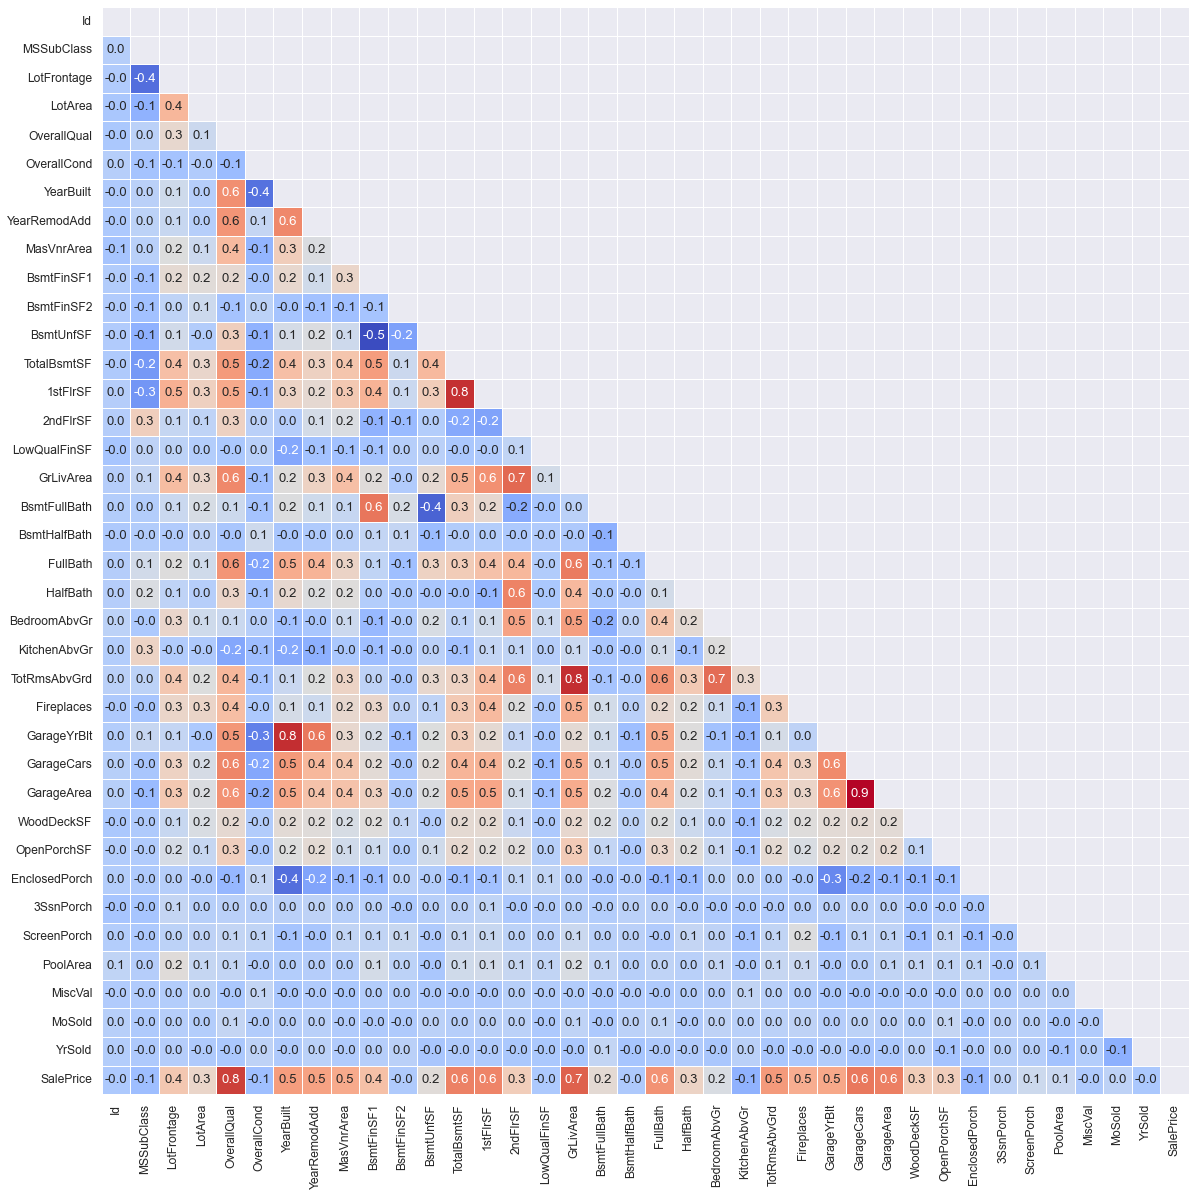

In [5]:
sns.set(font_scale=1.1)
correlation_learn = learn_df.corr()
mask = np.triu(correlation_learn.corr())
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_learn,
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            mask=mask,
            linewidths=1,
            cbar=False)

plt.show()

# **What to keep from the Coorelation Heat Map (feature selection)**

The features that I'm looking to work with are **OverallQual (0.8), GrLivArea (0.7), TotalBsmtSF (0.6), 1stFlrSF (0.6), FullBath (0.6), GarageCars (0.6), GarageArea (0.6), YearBuilt (0.5), YearRemodAdd (0.5), MasVnrArea (0.5), TotRmsAbvGrd (0.5), Fireplaces (0.5), GarageYrBlt (0.5).** I selected these features because these are the closest values to +1 and this implies a strong cooralation to the SalesPrice.

# Step 5: Visualizing and Exploring the Data

In this step, you will have to develop ideas that can help identify hidden patterns and insights. You will have to find more interesting patterns in the data, such as why sales of a particular product or service have gone up or down. You must analyze or notice this kind of data more thoroughly. This is one of the most crucial steps in a data science process.


This stage will focus on comprehending the nature and relationships of the features. This data is also available in [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) as data_description.txt, which has a full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here.

https://www.analyticsvidhya.com/blog/2021/04/20-must-known-pandas-function-for-exploratory-data-analysis-eda/


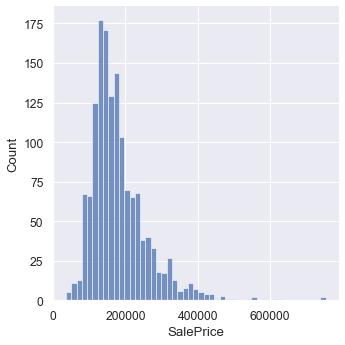

In [11]:
#Distributions
sns.displot(learn_df['SalePrice']);

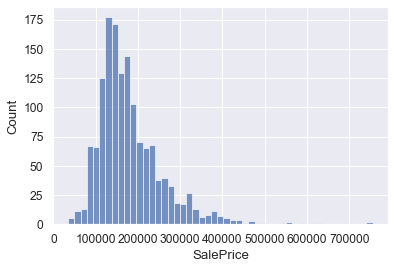

In [12]:
#Histogram of Binned Counts
sns.histplot(learn_df['SalePrice']);

# **Relationship with Numerical Variables**

These are called **bivariate associations**. An association is any relationship between two variables that makes them dependent, i.e. knowing the value of one variable gives us some information about the possible values of the second variable. **<sup>2</sup>**

The first bivariate association I am plotting is that of **'SalePrice'** and **'GrLivArea'**. I belive that the majority of people consider living space as one of the principal characteristics of a home.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


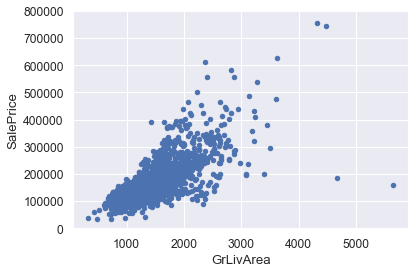

In [13]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([learn_df['SalePrice'], learn_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

**'SalePrice'** and **'GrLivArea'** display a **linear relationship**. A linear relationship (or linear association) is a statistical term used to describe a straight-line relationship between two variables. Linear relationships can be expressed either in a graphical format or as a mathematical equation of the form **y = mx + b**.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


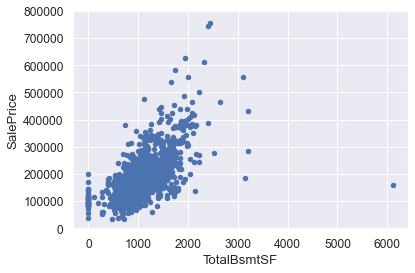

In [14]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([learn_df['SalePrice'], learn_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

# **Relationship with categorical features**

The way in which you display and summarize variables depends on whether it is a **categorical variable** or a **measurement variable**. For example a pie chart or bar graph might be used to display the distribution of a categorical variable while a boxplot or histogram might be used to picture the distribution of a measurement variable. To study the relationship between two variables, a comparative bar graph will show associations between categorical variables while a scatterplot illustrates associations for measurement variables to summarize quantitative variables with measures of center and spread and correlation. **<sup>3</sup>**

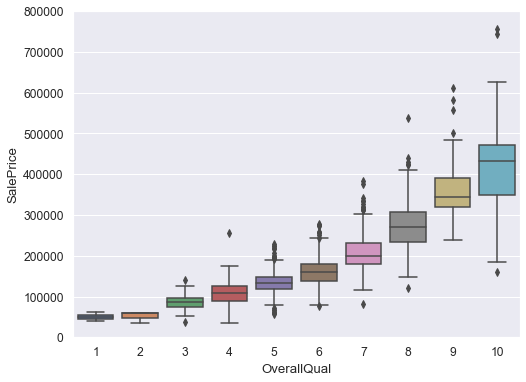

In [15]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([learn_df['SalePrice'], learn_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

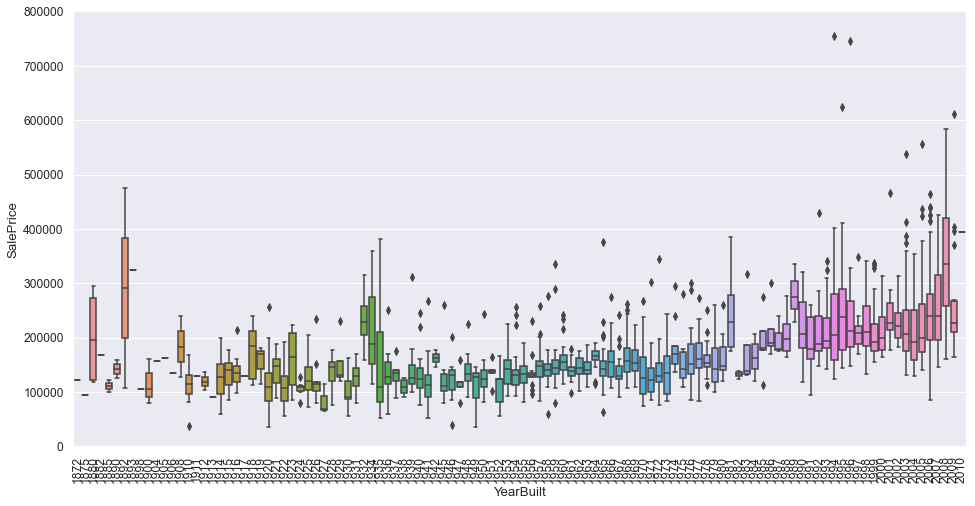

In [16]:
var = 'YearBuilt'
data = pd.concat([learn_df['SalePrice'], learn_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# **Scatter plots between 'SalePrice' and correlated variables**

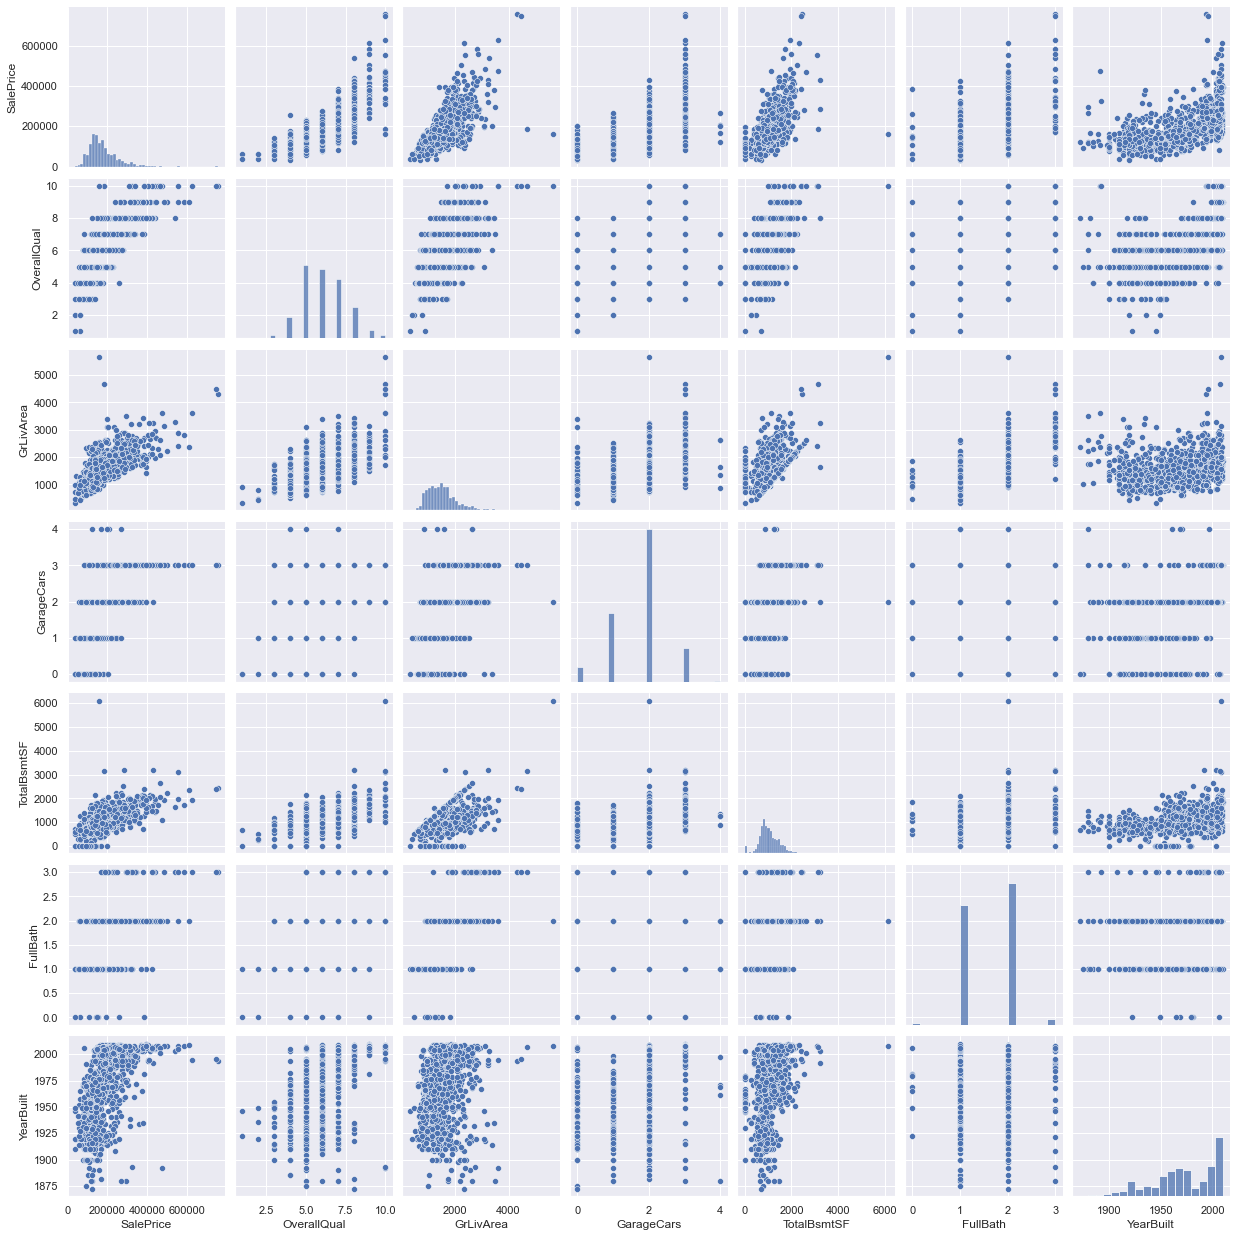

In [17]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(learn_df[cols], height = 2.5)
plt.show();

# Missing Values

In [6]:
#Showing How Many Total Missing Values there are in my dataset
learn_df.isnull().sum().sum()

6965

In [7]:
# To show show all columns, instead of a truncated list
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None

#To Show Missing Values
#learn_df.isnull().sum()

#To Show Missing Values Percentages
total = learn_df.isnull().sum().sort_values(ascending=False)
percent = (learn_df.isnull().sum()/learn_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479



# Next step is handling null values

**When more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed.**

This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house - maybe that's the reason why data is missing. Variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers.

In what concerns the remaining cases, we can see that 'Garage' related variables have the same number of missing data. that probably refers to the same set of observations. Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'Garage' variables. The same logic applies to 'Bsmt' variables.

Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In [8]:
#dealing with missing data
learn_df = learn_df.drop((missing_data[missing_data['Total'] > 1]).index,1)
learn_df = learn_df.drop(learn_df.loc[learn_df['Electrical'].isnull()].index)

#checking for missing data
learn_df.isnull().sum().max() 

/var/folders/j5/k_yddz7d4yz47l4zt2y3yvpm0000gn/T/ipykernel_15293/706165343.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  learn_df = learn_df.drop((missing_data[missing_data['Total'] > 1]).index,1)


0

In [9]:
# Giving Alley categories numerical value
#learn_df['Alley'] = learn_df['Alley'].str.replace('Grvl','2')
#learn_df['Alley'] = learn_df['Alley'].str.replace('Pave','1')
#learn_df['Alley'] = learn_df['Alley'].str.replace('NA','0')

#train.iloc['Alley'].fillna('NA', inplace=True)
#learn_df['LotFrontage'] = learn_df['LotFrontage'].fillna(0)
#learn_df['Alley'] = learn_df['Alley'].fillna(0)

# Convert "Alley" Strings to Integers using the astype approach.
#learn_df['Alley'] = learn_df['Alley'].astype(int)
# I can also use the to-numeric approach.

#print (learn_df)

# **Outliers**

Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

# **Univariate analysis**

Univariate analysis is the simplest form of analyzing data. Univariate analysis explores each variable in a data set, separately. “Uni” means “one”, so in other words your data has only one variable. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. Descriptive statistics describe and summarize data.  **<sup>4</sup>** It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll **standardize (the process of converting data to a common format to enable users to process and analyze it)** the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1. **<sup>5</sup>**

In [10]:
#standardizing data
saleprice_scaled = StandardScaler().fit_transform(learn_df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


/var/folders/j5/k_yddz7d4yz47l4zt2y3yvpm0000gn/T/ipykernel_15293/1253495371.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(learn_df['SalePrice'][:,np.newaxis]);


Low range values are similar and not too far from 0.

High range values are far from 0 and the above 7 values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with the 7.10041987 and
7.22629831 values

# **Bivariate analysis**

**'a change in perspective is worth 80 IQ points'. - Alan Kay**

When we look into things from a new perspective, there's always something to discover. 



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


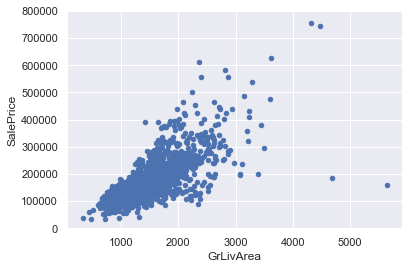

In [18]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([learn_df['SalePrice'], learn_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [ ]:
#deleting outliers
learn_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
learn_df = learn_df.drop(df_train[df_train['Id'] == 1299].index)
learn_df = learn_df.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


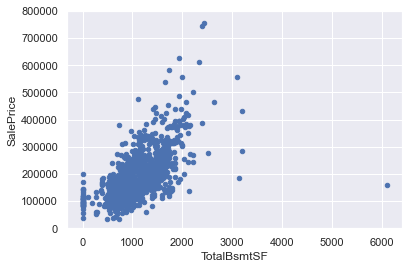

In [19]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([learn_df['SalePrice'], learn_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

I will eliminate values for TotalBsmtSF > 3000

# **Multivariate analysis**

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to Hair et al. (2013), four assumptions should be tested:

Normality - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

Homoscedasticity - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

Linearity- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Absence of correlated errors - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action please'? Probably... By the way, do you know what was Elvis's last great hit?

(...)

The bathroom floor.

In the search for normality
The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

**Histogram** - **Kurtosis** *(statistical measure used to describe the degree to which scores cluster in the tails or the peak of a frequency distribution)*  and **skewness** *(a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness). Visual example: https://www.youtube.com/watch?v=lK7nLzxiAQQ

**Normal probability plot** - Data distribution should closely follow the diagonal that represents the normal distribution.

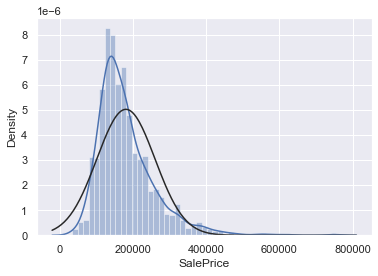

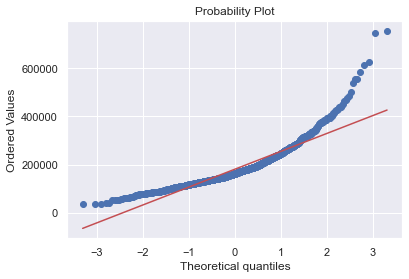

In [33]:
#histogram and normal probability plot 
sns.distplot(learn_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(learn_df['SalePrice'], plot=plt)

**'SalePrice' is not normal.** It shows **'peakedness'** *(Peakedness in a data distribution is the degree to which data values are concentrated around the mean. Datasets with high kurtosis tend to have a distinct peak near the mean and tend to decline rapidly, and have heavy tails)* , positive skewness and does not follow the diagonal line.

A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, **log transformations** *(arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality.)* usually works well. **<sup>5, 6</sup>**

In [35]:
#applying log transformation
learn_df['SalePrice'] = np.log(learn_df['SalePrice'])

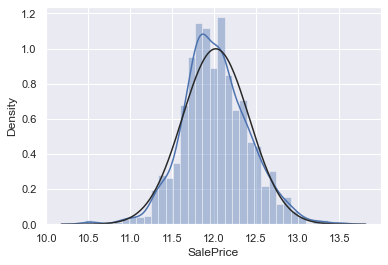

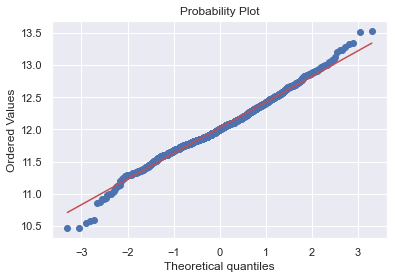

In [36]:
#transformed histogram and normal probability plot
sns.distplot(learn_df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(learn_df['SalePrice'], plot=plt)

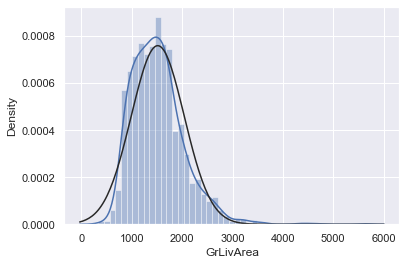

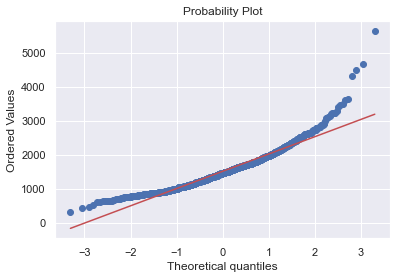

In [37]:
#histogram and normal probability plot for 'GrLivArea'
sns.distplot(learn_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(learn_df['GrLivArea'], plot=plt)

In [40]:
#data transformation
learn_df['GrLivArea'] = np.log(learn_df['GrLivArea'])

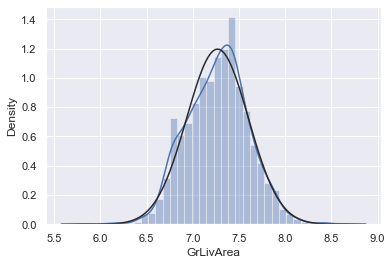

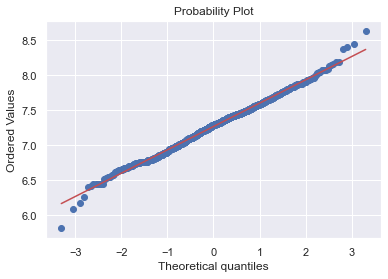

In [41]:
#transformed histogram and normal probability plot
sns.distplot(learn_df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(learn_df['GrLivArea'], plot=plt)

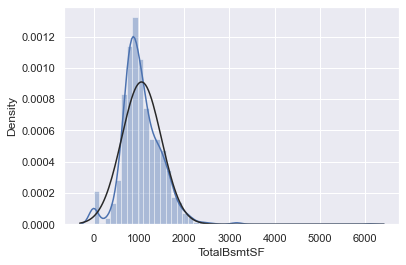

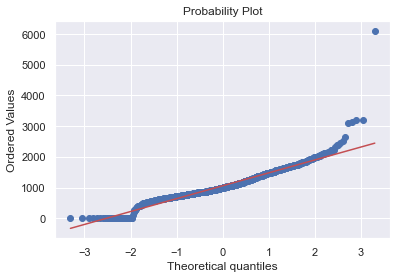

In [42]:
#histogram and normal probability plot "TotalBsmtSF"
sns.distplot(learn_df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(learn_df['TotalBsmtSF'], plot=plt)

In general, this presents skewness.
A significant number of observations with value zero (houses without basement).
This is a big problem because **the value zero doesn't allow us to do log transformations.**

# **'High Risk Engineering'**

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). The Basement SF should be close to the 1st Fl SF. 

Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement. **<sup>5<sup>**

In [44]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
learn_df['HasBsmt'] = pd.Series(len(learn_df['TotalBsmtSF']), index=learn_df.index)
learn_df['HasBsmt'] = 0 
learn_df.loc[learn_df['TotalBsmtSF']>0,'HasBsmt'] = 1

In [45]:
#transform data
learn_df.loc[learn_df['HasBsmt']==1,'TotalBsmtSF'] = np.log(learn_df['TotalBsmtSF'])

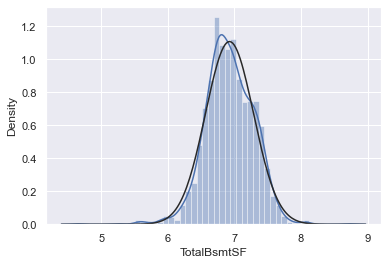

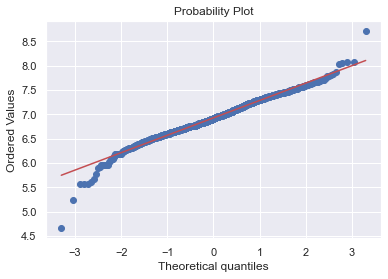

In [46]:
#histogram and normal probability plot
sns.distplot(learn_df[learn_df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(learn_df[learn_df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

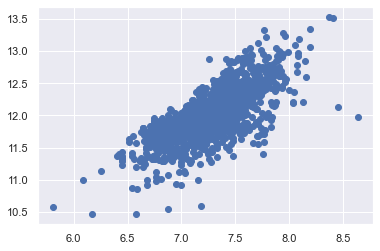

In [47]:
#scatter plot
plt.scatter(learn_df['GrLivArea'], learn_df['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

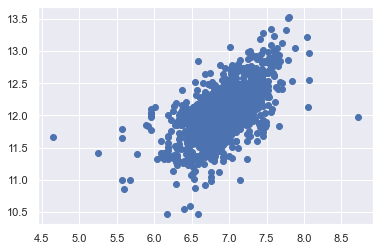

In [48]:
#scatter plot
plt.scatter(learn_df[learn_df['TotalBsmtSF']>0]['TotalBsmtSF'], learn_df[learn_df['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

# **Last but not the least, dummy variables**¶


In [ ]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

# **Step 6: Performing In-depth Analysis**

This step will test your mathematical, statistical, and technological knowledge. You must use all the data science tools to crunch the data successfully and discover every insight you can. You might have to prepare a predictive model that can compare your average customer with those who are underperforming. You might find several reasons in your analysis, like age or social media activity, as crucial factors in predicting the consumers of a service or product.

You might find several aspects that affect the customer, like some people may prefer being reached over the phone rather than social media. These findings can prove helpful as most of the marketing done nowadays is on social media and only aimed at the youth. How the product is marketed hugely affects sales, and you will have to target demographics that are not a lost cause after all. Once you are all done with this step, you can combine the quantitative and qualitative data that you have and move them into action.

# Step 7: Communicating Results of this Analysis

After all these steps, it is vital to convey your insights and findings to the sales head and make them understand their importance. It will help if you communicate appropriately to solve the problem you have been given. Proper communication will lead to action. In contrast, improper contact may lead to inaction.

You need to link the data you have collected and your insights with the sales head’s knowledge so that they can understand it better. You can start by explaining why a product was underperforming and why specific demographics were not interested in the sales pitch. After presenting the problem, you can move on to the solution to that problem. You will have to make a strong narrative with clarity and strong objectives.


# **References**

1. Cost of Living in Ames, Iowa - https://www.payscale.com/cost-of-living-calculator/Iowa-Ames

2. Chapter 22 Relationships between two variables - https://dzchilds.github.io/eda-for-bio/relationships-between-two-variables.html

3. Chapter 6: Relationships Between Categorical Variables - https://online.stat.psu.edu/stat100/lesson/6

4. Univariate Statistics - https://home.csulb.edu/~msaintg/ppa696/696uni.htm#:~:text=Univariate%20analysis%20explores%20each%20variable,statistics%20describe%20and%20summarize%20data.

5. Comprehensive data exploration with Python (PEDRO MARCELINO, PHD, April 30, 2022) - https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python

6. Log Transformation: Purpose and Interpretation (Kyaw Saw Htoon, Feb 29, 2020) 
https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9#:~:text=Log%20transformation%20is%20a%20data,on%20the%20natural%20log%20transformation.



# **Aknowledgements**

Thank you to **AngMig** *(abbreviated for privacy reasons)*  for introducting me to data science and steering me in the right direction. Thanks man.